In [1]:
%load_ext autoreload
%autoreload 2

# RAG-LLM Concept

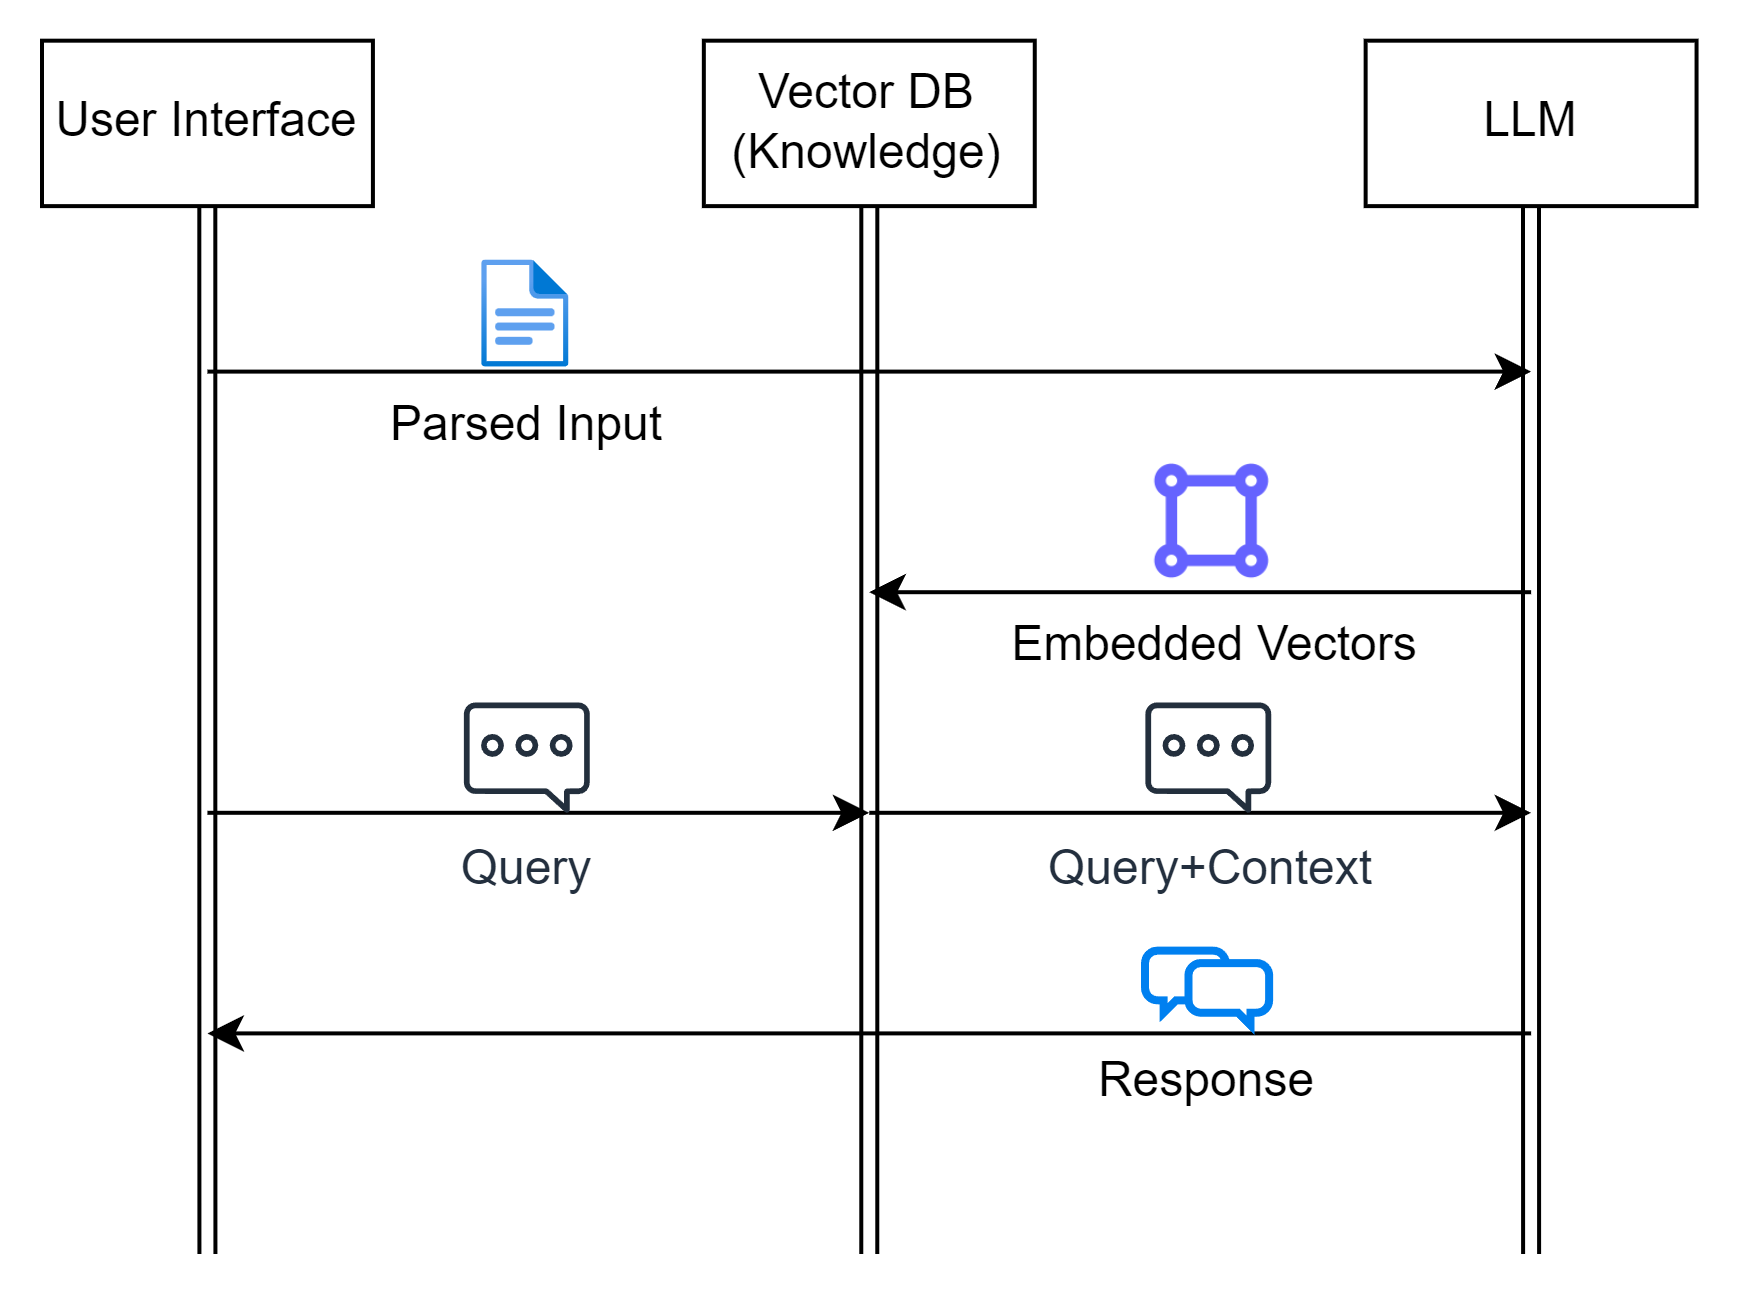

# Import Libs

In [2]:
from package import embeddings as ebd

In [64]:
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
import ollama
from langchain_community.llms import Ollama
import chromadb

# Import contants and udf

In [65]:
llm = Ollama(base_url = 'http://localhost:11434', model="mistral")

In [37]:
embeddings = OllamaEmbeddings(model="mistral")

In [39]:
persist_directory = "./vectordb"

In [7]:
def get_docs_from_url(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    text = loader.load()
    return text

def create_documents(text):    
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) # remember this we'll discuss about the overlapping later
    documents = text_splitter.split_documents(text)
    return documents

def add_to_vectordb(documents, embeddings, persist_directory=None, collection_name=None):
    db = Chroma.from_documents(
        documents=documents, 
        embedding=embeddings, 
        persist_directory=persist_directory, 
        collection_name=collection_name
    )
    return db

def load_vectordb(embeddings, persist_directory=None, collection_name=None):
    vectordb = Chroma(
        embedding_function=embeddings,
        persist_directory=persist_directory, 
        collection_name=collection_name, 
    )
    return vectordb

def format_context(context):
    # text = "\n\n"
    text = "\n"
    context = text.join(cntx.page_content for cntx in context)
    return context

def create_prompt(query, vectordb):
    context = vectordb.as_retriever().invoke(query)
    context = format_context(context)
    # prompt = f"Question: {query}\n\nContext: {context}"
    prompt = f"Query: {query}\n\nContext: {context}"
    return prompt

def ask_llm(prompt):
    response = ollama.chat(model='mistral', messages=[{'role': 'user', 'content': prompt}])
    return response['message']['content']

In [8]:
def add_website_data_to_vectordb(url, embeddings, persist_directory=None, collection_name=None):
    text = get_docs_from_url(url)
    documents = create_documents(text)
    add_to_vectordb(embeddings=embeddings, documents=documents, persist_directory=persist_directory, collection_name=collection_name)

# Test Drive

In [5]:
ollama.chat(model='mistral', messages=[{'role': 'user', 'content': "Query: Hi"}])

{'model': 'mistral',
 'created_at': '2024-04-09T16:46:25.9807355Z',
 'message': {'role': 'assistant',
  'content': " Hello! How can I help you today? If you have any specific question or topic in mind, feel free to ask and I'll do my best to provide accurate and helpful information. Otherwise, I'm here if you just want to chat about something interesting. Let me know what's on your mind!"},
 'done': True,
 'total_duration': 6673226200,
 'load_duration': 2588766300,
 'prompt_eval_count': 12,
 'prompt_eval_duration': 477887000,
 'eval_count': 65,
 'eval_duration': 3602069000}

# Understand how to get the content from the website using langchain

In [9]:
text = get_docs_from_url("https://ccp.net.au/the-problem-with-pop-psychology/")
documents = create_documents(text)

In [19]:
type(text), type(text[0])

(list, langchain_core.documents.base.Document)

In [20]:
type(documents), type(documents[0])

(list, langchain_core.documents.base.Document)

In [26]:
text[0].dict().keys(), documents[0].dict().keys()

(dict_keys(['page_content', 'metadata', 'type']),
 dict_keys(['page_content', 'metadata', 'type']))

In [27]:
len(text), len(documents)

(1, 16)

In [29]:
text[0].page_content

'\n\n\n\n\n\n\nThe Problem with Pop Psychology\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content \n\n\nMenu \n(03) 9077 0122\nENTER TELEHEALTH APPOINTMENT\n \n\n\n\n\n\n\n\n \n\nMenu \n\n\n\n\nMenu \nHOME\nABOUT\n\nOur Team\nFAQ\nWork With Us\n\n\nSERVICES\n\nTrauma\nPregnancy & Birth\nNew Parents\nAnxiety\nDepression\nPTSD\nADHD Assessment for Adults\nAbout Cognitive Processing Therapy for PTSD\nTelehealth\n\n\nFEES\nHOW TO REFER\nCLINICIAN TRAINING\nBLOG\nCONTACT\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nThe Problem with Pop Psychology \n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n\n \n\n\n \n\n\t\t\t\t\t\t\t\t\t\tJon Finch\t\t\t\t\t\n\n\n\n \n\nNovember 14, 2023 \n\n\n\n\n\n\nIn today’s fast-paced world, the language we use often reflects the latest trends and ideas. One area where this is particularly noticeable is in the realm of psychology. Terms like “narcissist,” “gaslighting,” and “toxic positivity” have 

In [30]:
documents[0].page_content

'The Problem with Pop Psychology\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content \n\n\nMenu \n(03) 9077 0122\nENTER TELEHEALTH APPOINTMENT\n \n\n\n\n\n\n\n\n \n\nMenu \n\n\n\n\nMenu \nHOME\nABOUT\n\nOur Team\nFAQ\nWork With Us\n\n\nSERVICES\n\nTrauma\nPregnancy & Birth\nNew Parents\nAnxiety\nDepression\nPTSD\nADHD Assessment for Adults\nAbout Cognitive Processing Therapy for PTSD\nTelehealth\n\n\nFEES\nHOW TO REFER\nCLINICIAN TRAINING\nBLOG\nCONTACT\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nThe Problem with Pop Psychology \n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n\n \n\n\n \n\n\t\t\t\t\t\t\t\t\t\tJon Finch\t\t\t\t\t\n\n\n\n \n\nNovember 14, 2023'

In [31]:
documents[1].page_content

'In today’s fast-paced world, the language we use often reflects the latest trends and ideas. One area where this is particularly noticeable is in the realm of psychology. Terms like “narcissist,” “gaslighting,” and “toxic positivity” have become commonplace in everyday conversations. These terms can be considered pop-psychology terminology. This blog will explore the pitfalls of pop-psychology terminology and why it’s important to approach these concepts with caution and nuance.\nWhat is Pop Psychology?\nPop psychology is a term used to describe the popularization of psychological theories and concepts. It is often found in self-help books, magazines, across social media and TV shows. While pop psychology can be a way to learn about psychology, and describe phenomenon, it is important to be aware of its limitations.\nThe Problem(s) with Pop Psychology\nOversimplification of Complex Issues'

In [35]:
documents[2].page_content

'Mental health is a complex area. One of the drawbacks of pop-psychology terminology is the oversimplification of complex psychological issues. Terms used by mental health professionals have specific meaning and happen in the context of diagnosis for treatment. \xa0\xa0The process of diagnosis and treatment happens with a comprehensive understanding of the individual’s background, history, and individual circumstances. Oversimplification can lead to misunderstandings and misjudgements. The use of pop psychology terminology in everyday language can label people or behaviours incorrectly. This can lead to people misunderstanding mental health conditions. For example, someone might say that they are “OCD” because they like to keep their house clean. However, OCD is a serious mental health condition that is characterized by obsessive thoughts and compulsive behaviours. It causes debilitating distress for some sufferers. \xa0Pop psychology terminology can trivialize mental health conditions

In [33]:
documents[3].page_content

'that is characterized by obsessive thoughts and compulsive behaviours. It causes debilitating distress for some sufferers. \xa0Pop psychology terminology can trivialize mental health conditions and may make it difficult for people to get the help they need.'

In [24]:
len(documents[0].page_content), len(documents[1].page_content), len(documents[2].page_content), len(documents[3].page_content)

(560, 897, 998, 254)

# Add documents to vector database

In [8]:
add_to_vectordb(embeddings=embeddings, documents=documents, persist_directory=persist_directory, collection_name="pop_psychology")

# Load vector database

In [40]:
vectordb = load_vectordb(embeddings=embeddings, persist_directory=persist_directory, collection_name="pop_psychology")

# Understand how RAG construct the prompt

In [45]:
%%time
query = 'is pop psychology a bad thing'
context = vectordb.as_retriever().invoke(query)

CPU times: total: 15.6 ms
Wall time: 2.42 s


In [46]:
context

[Document(page_content='sexual assault, childhood sexual assault and domestic violence, those involved in motor vehicle accidents, soldiers, war veterans/peace keepers, police members, and emergency services workers. Jon also has extensive experience working with people experiencing depression, anxiety and adjustment disorders, and those suffering from substance use difficulties.', metadata={'description': "In today's fast-paced world, the language we use often reflects the latest trends and ideas. One area where this is particularly noticeable is in the", 'language': 'en-AU', 'source': 'https://ccp.net.au/the-problem-with-pop-psychology/', 'title': 'The Problem with Pop Psychology'}),
 Document(page_content='Jon Finch is a clinical psychologist who specialises in the treatment of Posttraumatic Stress Disorder (PTSD). He is a skilled psychologist with 20 years experience. Jon is a certified Cognitive Processing Therapy (CPT) for PTSD trainer. Jon is also a certified, individual Schema 

In [47]:
type(context), type(context[0])

(list, langchain_core.documents.base.Document)

In [51]:
context[0].dict().keys()

dict_keys(['page_content', 'metadata', 'type'])

In [53]:
context[0].page_content

'sexual assault, childhood sexual assault and domestic violence, those involved in motor vehicle accidents, soldiers, war veterans/peace keepers, police members, and emergency services workers. Jon also has extensive experience working with people experiencing depression, anxiety and adjustment disorders, and those suffering from substance use difficulties.'

In [54]:
context[0].metadata

{'description': "In today's fast-paced world, the language we use often reflects the latest trends and ideas. One area where this is particularly noticeable is in the",
 'language': 'en-AU',
 'source': 'https://ccp.net.au/the-problem-with-pop-psychology/',
 'title': 'The Problem with Pop Psychology'}

In [55]:
context[0].type

'Document'

In [56]:
context = format_context(context)

In [57]:
context

'sexual assault, childhood sexual assault and domestic violence, those involved in motor vehicle accidents, soldiers, war veterans/peace keepers, police members, and emergency services workers. Jon also has extensive experience working with people experiencing depression, anxiety and adjustment disorders, and those suffering from substance use difficulties.\nJon Finch is a clinical psychologist who specialises in the treatment of Posttraumatic Stress Disorder (PTSD). He is a skilled psychologist with 20 years experience. Jon is a certified Cognitive Processing Therapy (CPT) for PTSD trainer. Jon is also a certified, individual Schema Therapist (standard level) with the International Society of Schema Therapy. Jon began his career working with soldiers, war veterans/peace keepers at the Veteran and Veterans Families Counselling Service, in the role of counsellor and Deputy Director. He then worked for Davidson Trahaire Corpsych as the Victorian Trauma Services Manager. He moved on to wo

In [58]:
print(context)

sexual assault, childhood sexual assault and domestic violence, those involved in motor vehicle accidents, soldiers, war veterans/peace keepers, police members, and emergency services workers. Jon also has extensive experience working with people experiencing depression, anxiety and adjustment disorders, and those suffering from substance use difficulties.
Jon Finch is a clinical psychologist who specialises in the treatment of Posttraumatic Stress Disorder (PTSD). He is a skilled psychologist with 20 years experience. Jon is a certified Cognitive Processing Therapy (CPT) for PTSD trainer. Jon is also a certified, individual Schema Therapist (standard level) with the International Society of Schema Therapy. Jon began his career working with soldiers, war veterans/peace keepers at the Veteran and Veterans Families Counselling Service, in the role of counsellor and Deputy Director. He then worked for Davidson Trahaire Corpsych as the Victorian Trauma Services Manager. He moved on to work

In [59]:
prompt = f"Query: {query}\n\nContext: {context}"
prompt

'Query: is pop psychology a bad thing\n\nContext: sexual assault, childhood sexual assault and domestic violence, those involved in motor vehicle accidents, soldiers, war veterans/peace keepers, police members, and emergency services workers. Jon also has extensive experience working with people experiencing depression, anxiety and adjustment disorders, and those suffering from substance use difficulties.\nJon Finch is a clinical psychologist who specialises in the treatment of Posttraumatic Stress Disorder (PTSD). He is a skilled psychologist with 20 years experience. Jon is a certified Cognitive Processing Therapy (CPT) for PTSD trainer. Jon is also a certified, individual Schema Therapist (standard level) with the International Society of Schema Therapy. Jon began his career working with soldiers, war veterans/peace keepers at the Veteran and Veterans Families Counselling Service, in the role of counsellor and Deputy Director. He then worked for Davidson Trahaire Corpsych as the Vic

In [60]:
print(prompt)

Query: is pop psychology a bad thing

Context: sexual assault, childhood sexual assault and domestic violence, those involved in motor vehicle accidents, soldiers, war veterans/peace keepers, police members, and emergency services workers. Jon also has extensive experience working with people experiencing depression, anxiety and adjustment disorders, and those suffering from substance use difficulties.
Jon Finch is a clinical psychologist who specialises in the treatment of Posttraumatic Stress Disorder (PTSD). He is a skilled psychologist with 20 years experience. Jon is a certified Cognitive Processing Therapy (CPT) for PTSD trainer. Jon is also a certified, individual Schema Therapist (standard level) with the International Society of Schema Therapy. Jon began his career working with soldiers, war veterans/peace keepers at the Veteran and Veterans Families Counselling Service, in the role of counsellor and Deputy Director. He then worked for Davidson Trahaire Corpsych as the Victori

In [43]:
%%time
query = "is pop psychology a bad thing?"
prompt = create_prompt(query, vectordb=vectordb)

CPU times: total: 0 ns
Wall time: 2.48 s


# Fetch RAG-Prompt to LLM

In [61]:
%%time
result = ask_llm(prompt)

CPU times: total: 0 ns
Wall time: 8.98 s


In [62]:
result

' Pop psychology can be a double-edged sword when it comes to understanding and addressing mental health conditions, particularly in the context of sensitive issues like PTSD, childhood sexual assault, and domestic violence. While some pop psychology ideas may seem helpful, they can also trivialize mental health conditions and make it more difficult for people to access professional help. It is essential to be discerning about where we get our information on psychology and to practice critical thinking skills to avoid the negative effects of pop psychology. Instead, seeking help from qualified professionals like clinical psychologists with expertise in trauma and PTSD treatment is crucial for those who are struggling with these issues.'

In [63]:
print(result)

 Pop psychology can be a double-edged sword when it comes to understanding and addressing mental health conditions, particularly in the context of sensitive issues like PTSD, childhood sexual assault, and domestic violence. While some pop psychology ideas may seem helpful, they can also trivialize mental health conditions and make it more difficult for people to access professional help. It is essential to be discerning about where we get our information on psychology and to practice critical thinking skills to avoid the negative effects of pop psychology. Instead, seeking help from qualified professionals like clinical psychologists with expertise in trauma and PTSD treatment is crucial for those who are struggling with these issues.


In [66]:
%%time
result = llm.invoke(prompt)

CPU times: total: 15.6 ms
Wall time: 8.72 s


In [67]:
result

" Pop psychology can be problematic when it trivialized mental health conditions and obscures accurate information, potentially making it harder for individuals in need to seek professional help. It's crucial to evaluate the sources of psychological information critically and ensure they are reliable, written by psychologists with references to research, and published by reputable organizations. Employing critical thinking can help minimize the negative effects of pop psychology, and remember that it should never replace seeking assistance from qualified professionals for mental health concerns."

In [68]:
print(result)

 Pop psychology can be problematic when it trivialized mental health conditions and obscures accurate information, potentially making it harder for individuals in need to seek professional help. It's crucial to evaluate the sources of psychological information critically and ensure they are reliable, written by psychologists with references to research, and published by reputable organizations. Employing critical thinking can help minimize the negative effects of pop psychology, and remember that it should never replace seeking assistance from qualified professionals for mental health concerns.


# Continue having fun in the streamlit